In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

__Задача 1__

Даны значения величины заработной платы заемщиков банка (`salary`) и значения их поведенческого кредитного скоринга (`scoring`):
```
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
```
Возьмём в качестве признака значение `salary`, а в качестве целевой переменной - `scoring`.

1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
2. Постройте `scatter plot` по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
3. Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
5. Постройте для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента.

In [2]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

_Формулы парной регрессии_

In [3]:
b1 = ((salary * scoring).mean() - salary.mean() * scoring.mean()) / ((salary ** 2).mean() - salary.mean() ** 2)
b1

2.620538882402765

In [4]:
b0 = scoring.mean() - b1 * salary.mean()
b0

444.1773573243596

_Метод наименьших квадратов_

In [5]:
salary.shape

(10,)

In [6]:
X = np.hstack((np.ones(salary.shape).reshape(-1, 1), salary.reshape(-1, 1)))
X

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [7]:
XTX = X.T.dot(X)
np.linalg.det(XTX)

349464.00000000023

In [8]:
b = np.linalg.inv(XTX).dot(X.T).dot(scoring)
b

array([444.17735732,   2.62053888])

Text(0, 0.5, 'Scoring')

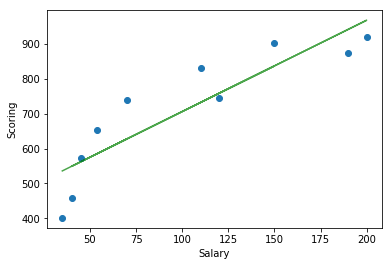

In [9]:
ox = salary
oy = b0 + b1 * ox

plt.scatter(salary, scoring)
plt.plot(ox, oy, color='green', alpha=0.7)
plt.xlabel('Salary')
plt.ylabel('Scoring')

_Коэффициент детерминации и средняя ошибка аппроксимации_

In [10]:
R = oy.var()/scoring.var()
R

0.7876386635293678

In [11]:
np.corrcoef(salary, scoring) ** 2

array([[1.        , 0.78763866],
       [0.78763866, 1.        ]])

In [12]:
def mae(y, y_pred):
    return np.abs((y - y_pred) / y).mean()

In [13]:
mae(scoring, oy)

0.11469251843561709

_Оцените построенное уравнение регрессии с помощью F-критерия Фишера_

In [14]:
k1 = 1
k2 = salary.shape[0] - 2

T = (R / (1 - R)) * (k2 / k1)
T

29.67164085966437

In [15]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

_Наша статистика T больше критического значения F, значит наше уравнение регрессии: $y = 444.1774 + 2.62x$ статистически значимо_ 

_Постройте для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента_

$$S_{slope} = \sqrt{\dfrac{\frac{1}{n - 2} \displaystyle\sum_{i=1}^{n}(y_i - z_i)^2}{\displaystyle\sum_{i=1}^n (x_i - \overline{x})^2}},$$

In [16]:
def se_slope(x, y, y_pred):
    n = x.shape[0]
    x_mean = x.mean()
    return ((((y - y_pred) ** 2).sum() / (n - 2)) / ((x - x_mean) ** 2).sum()) ** 0.5

In [17]:
slope = se_slope(salary, scoring, oy)
slope

0.48108279568516005

In [18]:
def se_intercept(x, y, y_pred):
    return se_slope(x, y, y_pred) * ((x ** 2).mean()) ** 0.5

In [19]:
intercept = se_intercept(salary, scoring, oy)
intercept

56.46649755068153

_доверительные интервалы для b0 и b1_

In [20]:
t = stats.t.ppf(1- alpha / 2, df = salary.shape[0] - 2)
t

2.3060041350333704

In [21]:
b1_interval = (b1 - t * slope, b1 + t * slope)
b0_interval = (b0 - t * intercept, b0 + t * intercept)
print(f'{b1_interval[0]} <= b1 <= {b1_interval[1]}')
print(f'{b0_interval[0]} <= b0 <= {b0_interval[1]}')

1.5111599662593718 <= b1 <= 3.729917798546158
313.9653804816363 <= b0 <= 574.3893341670829


Text(0, 0.5, 'Scoring')

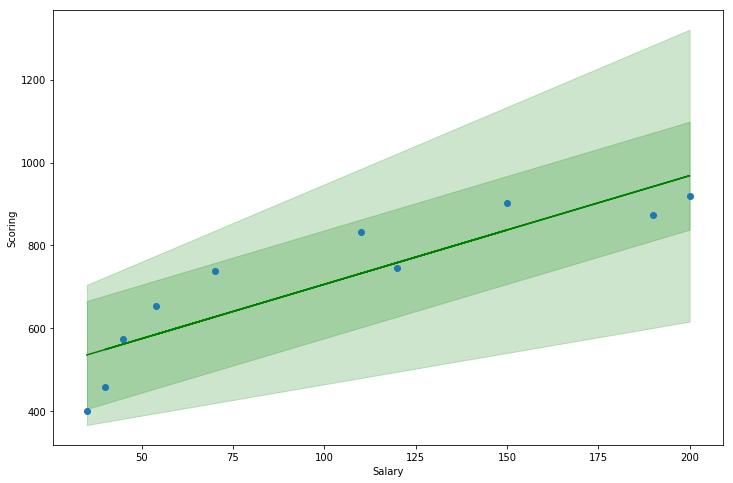

In [22]:
ox = salary
oy = b0 + b1 * ox
x = np.linspace(35, 200, 100)
y_min = b0_interval[0] + b1_interval[0] * x
y_max = b0_interval[1] + b1_interval[1] * x
y_min_2 = b0_interval[0] + b1 * x
y_max_2 = b0_interval[1] + b1 * x

plt.figure(figsize=(12,8))
plt.fill_between(x, y_min, y_max, color='green', alpha=0.2)
plt.fill_between(x, y_min_2, y_max_2, color='green', alpha=0.2)
plt.scatter(salary, scoring)
plt.plot(ox, oy, color='green')
plt.xlabel('Salary')
plt.ylabel('Scoring')

__Задача 2__

Допустим, первые 5 клиентов из предыдущего задания проживают в Москве, а остальные - в Санкт-Петербурге. Влияет ли этот фактор на значение их кредитного скоринга?

In [23]:
scoring

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [24]:
city = np.hstack((np.ones(5), np.zeros(5)))
city

array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.])

In [25]:
df = pd.DataFrame({'Scoring' : scoring, 'City' : city})
df

,Scoring,City
0,401,1.0
1,574,1.0
2,874,1.0
3,919,1.0
4,459,1.0
5,739,0.0
6,653,0.0
7,902,0.0
8,746,0.0
9,832,0.0


In [26]:
n1 = df.loc[df['City'] == 1].shape[0]
n2 = df.loc[df['City'] == 0].shape[0]
y_mean = df['Scoring'].mean()
y1_mean = df.loc[df['City'] == 1, 'Scoring'].mean()
y2_mean = df.loc[df['City'] == 0, 'Scoring'].mean()
y_mean, y1_mean, y2_mean

(709.9, 645.4, 774.4)

In [27]:
y1 = df.loc[df['City'] == 1, 'Scoring'].values
y2 = df.loc[df['City'] == 0, 'Scoring'].values
y1, y2

(array([401, 574, 874, 919, 459]), array([739, 653, 902, 746, 832]))

In [28]:
S2_F = n1 * (y1_mean - y_mean) ** 2 + n2 * (y2_mean - y_mean) ** 2
S2_res = ((y1 - y1_mean) ** 2).sum() + ((y2 - y2_mean) ** 2).sum()
S2_F, S2_res

(41602.5, 263086.39999999997)

In [29]:
k1 = 1
k2 = 8
sigma2_F = S2_F / k1
sigma2_res = S2_res / k2
sigma2_F, sigma2_res

(41602.5, 32885.799999999996)

In [30]:
T = sigma2_F / sigma2_res
T

1.2650596914169643

In [31]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

_Видим что наша статистика T меньше критического значения, значит факт проживания в каком-либо городе не влияет на кредитный скоринг_

__Задача 3__

Посчитать коэффициенты линейной регрессии для т.н. Квартета Энскомба (см. урок 6).

In [32]:
df_ans = pd.read_csv('anscombe_dataset.csv', index_col='id')
df_ans

,x1,y1,x2,y2,x3,y3,x4,y4
id,,,,,,,,
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56


In [33]:
def regr_coef(df):
    x = df.values[:, 0]
    y = df.values[:, 1]
    ones = np.ones(x.shape[0]).reshape(-1, 1)
    X = np.hstack((ones, x.reshape(-1, 1)))
    XTX = X.T.dot(X)
    b = np.linalg.inv(XTX).dot(X.T).dot(y)
    return b

In [34]:
for i in range(1, 5):
    str_x = f'x{i}'
    str_y = f'y{i}'
    b = regr_coef(df_ans[[str_x, str_y]])
    print(f'Сет номер {i}: y = {b[0]} + {b[1]} * x')

Сет номер 1: y = 3.0000909090908916 + 0.5000909090909096 * x
Сет номер 2: y = 3.0009090909090745 + 0.5000000000000004 * x
Сет номер 3: y = 3.002454545454529 + 0.4997272727272733 * x
Сет номер 4: y = 3.0017272727272566 + 0.4999090909090912 * x


_По поводу итогового проекта: начал писать парсер сайта cian.ru, буду писать работу по реальной базе недвижимости._

_в файле $test.csv$ лежат ~ 450 тестовых записей результата работы парсера, еще без обработки, в сыром виде_